## Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [2]:
def daySignal(day_change):
    if day_change > 0:
        return 1
    elif day_change < 0:
        return -1
    else:
        return 0

def addDateParts(df):
    df['day_of_year'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week'] = df.index.week
    df['month'] = df.index.month
    return df

## Get Data

In [9]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1D', start='2017-1-1', end='2023-1-13')

# Some calculated variables
df['day_change'] = df['Close'] - df['Open']
df['day_change_pct'] = (df['day_change'] / df['Open']) * 100
df['day_change_signal'] = df['day_change'].apply(daySignal)

# Lagging close, high and low by one day
for feature in ['Close', 'High', 'Low']:
    df[f"{feature}_lag1"] = df[feature].shift(1).bfill() 

# Adding date features
df = addDateParts(df)

# Exit datetime index
df = df.reset_index()

# View dataframe
df.head(5)

C:\Users\steph\AppData\Local\Temp\ipykernel_18584\3779007080.py:12: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_change,day_change_pct,day_change_signal,Close_lag1,High_lag1,Low_lag1,day_of_year,day_of_week,week,month
0,2017-01-03 00:00:00-05:00,57.838814,57.884871,57.230857,57.645374,20694100,0.0,0.0,-0.193440,-0.334447,-1,57.645374,57.884871,57.230857,3,1,1,1
1,2017-01-04 00:00:00-05:00,57.553250,57.801960,57.221637,57.387444,21340000,0.0,0.0,-0.165807,-0.288093,-1,57.645374,57.884871,57.230857,4,2,1,1
2,2017-01-05 00:00:00-05:00,57.286117,57.719057,57.138733,57.387444,24876000,0.0,0.0,0.101327,0.176878,1,57.387444,57.801960,57.221637,5,3,1,1
3,2017-01-06 00:00:00-05:00,57.387445,58.170422,57.147948,57.884865,19922900,0.0,0.0,0.497420,0.866775,1,57.387444,57.719057,57.138733,6,4,1,1
4,2017-01-09 00:00:00-05:00,57.811167,58.105937,57.608517,57.700630,20382700,0.0,0.0,-0.110537,-0.191203,-1,57.884865,58.170422,57.147948,9,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype                           
---  ------             --------------  -----                           
 0   Date               1518 non-null   datetime64[ns, America/New_York]
 1   Open               1518 non-null   float64                         
 2   High               1518 non-null   float64                         
 3   Low                1518 non-null   float64                         
 4   Close              1518 non-null   float64                         
 5   Volume             1518 non-null   int64                           
 6   Dividends          1518 non-null   float64                         
 7   Stock Splits       1518 non-null   float64                         
 8   day_change         1518 non-null   float64                         
 9   day_change_pct     1518 non-null   float64                         
 10  day_change_s

## EDA

### Descriptive statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1518.0,1.699785e+02,8.274119e+01,5.728612e+01,9.635903e+01,1.489470e+02,2.433916e+02,3.414208e+02
High,1518.0,1.717172e+02,8.366872e+01,5.771906e+01,9.718098e+01,1.530205e+02,2.456752e+02,3.464239e+02
Low,1518.0,1.681324e+02,8.174320e+01,5.706504e+01,9.541241e+01,1.477610e+02,2.406761e+02,3.390233e+02
Close,1518.0,1.700086e+02,8.274444e+01,5.738744e+01,9.642317e+01,1.507952e+02,2.433784e+02,3.399248e+02
Volume,1518.0,2.894869e+07,1.254223e+07,7.425600e+06,2.090828e+07,2.586475e+07,3.326102e+07,1.112421e+08
Dividends,1518.0,7.990777e-03,6.396157e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.800000e-01
Stock Splits,1518.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
day_change,1518.0,3.017711e-02,2.802268e+00,-1.552455e+01,-1.009312e+00,1.024580e-01,1.119345e+00,2.192025e+01
day_change_pct,1518.0,2.779145e-02,1.403093e+00,-5.924653e+00,-6.753313e-01,8.814980e-02,7.919621e-01,8.102450e+00
day_change_signal,1518.0,7.773386e-02,9.959799e-01,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Correlation

In [14]:
import plotly.express as px

#df = px.data.medals_wide(indexed=True)
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, text_auto=True, aspect='auto')
fig.show()

C:\Users\steph\AppData\Local\Temp\ipykernel_18584\4100264492.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Decomposition

In [17]:
from functions import plot_seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['day_change'], model='additive', period=365)
fig = plot_seasonal_decompose(decomposition, dates=df['Date'])
fig.show()

### Causality

### Charting

### Profit/loss

<AxesSubplot: title={'center': 'Number of days positive or negative change'}, ylabel='Frequency'>

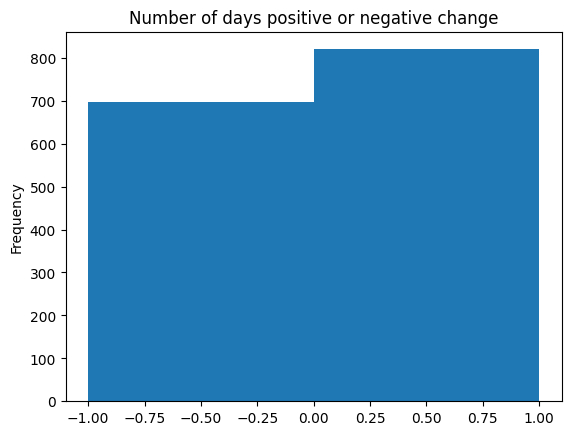

In [283]:
tickerDf['day_change_signal'].plot.hist(bins=2, title='Number of days positive or negative change')

<AxesSubplot: xlabel='Date'>

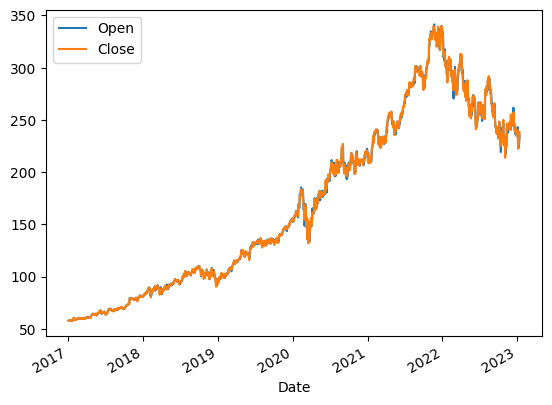

In [284]:
tickerDf[['Open', 'Close']].plot()

<AxesSubplot: xlabel='Date'>

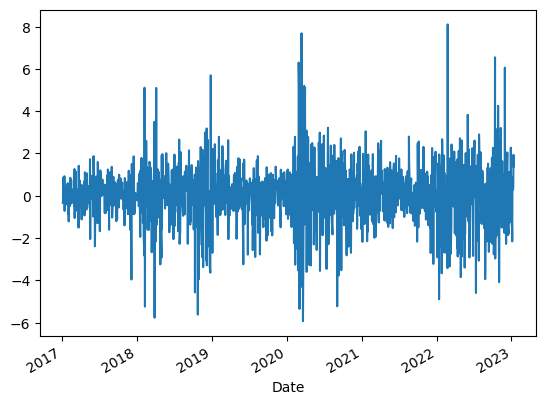

In [285]:
tickerDf['day_change_pct'].plot()

## Data prep

### Feature selection

We will attempt to predict signal based only on open price and close from previous day

In [286]:
X = tickerDf[['Open', 'Close_lag1', 'day_of_year', 'day_of_week', 'week', 'month']]
y = tickerDf['day_change_signal']

### Train/test splt

In [287]:
split = X.index.max() -dt.timedelta(days=1*365)

X_train = X[X.index < split]
y_train = y[y.index < split]
X_test = X[X.index >= split]
y_test = y[y.index >= split]

In [288]:
print(f"The shape of the training data is {X_train.shape} features and {y_train.shape}")
print("--------------------------")
print(f"The shape of the testing data is {X_test.shape} features and {y_test.shape}")

The shape of the training data is (1266, 6) features and (1266,)
--------------------------
The shape of the testing data is (252, 6) features and (252,)


### Check class balance and encode label

In [289]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_enc = pd.Series(le.fit_transform(y_train))
y_test_enc = pd.Series(le.transform(y_test))

In [290]:
y_train_enc.value_counts(normalize=True)

2    0.539494
0    0.458136
1    0.002370
dtype: float64

## Modelling

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score

In [296]:
perf_dict = dict()
model_dict = {
    'logr_clf':LogisticRegression(random_state=0),
    'svc_clf':SVC(gamma='auto'), 
}

In [298]:
def logPerf(y_pred, y_proba, y_test):

    # Log performance metrics
    perf_dict = {
        'accuracy': accuracy_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba, multi_class='ovr'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'kappa': cohen_kappa_score(y_test, y_pred)
    }

    ret_dict = {
        'y_pred': y_pred,
        'y_proba':y_proba,
        'perf_results': perf_dict
    }

    return ret_dict

In [299]:
for clf in model_dict:
    print(clf)
    # Define classifer
    clf = model_dict[i].fit(X_train, y_train_enc)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    perf_dict[clf] = logPerf(y_pred, y_proba, X_test)

logr_clf


AttributeError: predict_proba is not available when  probability=False

In [276]:
model_name = 'logr_clf'

# Define classifer
clf = LogisticRegression(random_state=0).fit(X_train, y_train_enc)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# Log performance metrics
perf_dict[model_name] = {
    'accuracy': accuracy_score(y_test_enc, y_pred),
    'auc': roc_auc_score(y_test_enc, y_proba, multi_class='ovr'),
    'precision': precision_score(y_test_enc, y_pred, average='weighted'),
    'recall': recall_score(y_test_enc, y_pred, average='weighted'),
    'f1': f1_score(y_test_enc, y_pred, average='weighted'),
    'kappa': cohen_kappa_score(y_test_enc, y_pred)
}

c:\Users\steph\virtual_environments\tsvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\steph\virtual_environments\tsvenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
pd.DataFrame(perf_dict).T

,accuracy,auc,f1,kappa,precision,recall
logr_clf,0.519841,0.384198,0.502981,0.022786,0.509406,0.519841
